In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('train.csv')
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X=df.iloc[:,1:].values
X.shape

(42000, 784)

In [13]:
y=df['label'].values
y.shape

(42000,)

Data Preprocessing 

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
s_data=StandardScaler().fit_transform(X)

In [14]:
# Picking the top 1000 points 
data=s_data[:1000,:]
label=y[:1000]

Applying t-SNE and Visualising

In [16]:
from sklearn.manifold import TSNE

In [17]:
# the number of components = 2 
# default perplexity = 30 
# default learning rate = 200 
# default Maximum number of iterations 
dt=TSNE(n_components=2)

In [19]:
print(dt.shape)
dt

(1000, 2)


array([[  8.160426 ,  15.285545 ],
       [-43.347816 ,   7.771916 ],
       [  5.594743 ,  -5.9101143],
       ...,
       [ 40.709732 ,  -4.406449 ],
       [-24.62377  , -35.92594  ],
       [ 23.755241 ,   8.718368 ]], dtype=float32)

In [22]:
# creating new dataframe label
tsne_data=np.vstack((dt.T,label)).T
tsne_data

array([[  8.16042614,  15.28554535,   1.        ],
       [-43.34781647,   7.77191591,   0.        ],
       [  5.59474277,  -5.91011429,   1.        ],
       ...,
       [ 40.70973206,  -4.40644884,   9.        ],
       [-24.62376976, -35.92594147,   6.        ],
       [ 23.75524139,   8.71836758,   4.        ]])

In [25]:
tsne_df=pd.DataFrame(tsne_data,columns=['dim1','dim2','label'])
tsne_df

,dim1,dim2,label
0,8.160426,15.285545,1.0
1,-43.347816,7.771916,0.0
2,5.594743,-5.910114,1.0
3,26.663158,26.819384,4.0
4,-51.859371,9.271891,0.0
...,...,...,...
995,-11.517436,-12.307393,2.0
996,20.564951,-21.977144,5.0
997,40.709732,-4.406449,9.0
998,-24.623770,-35.925941,6.0


In [24]:
import seaborn as sn

c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


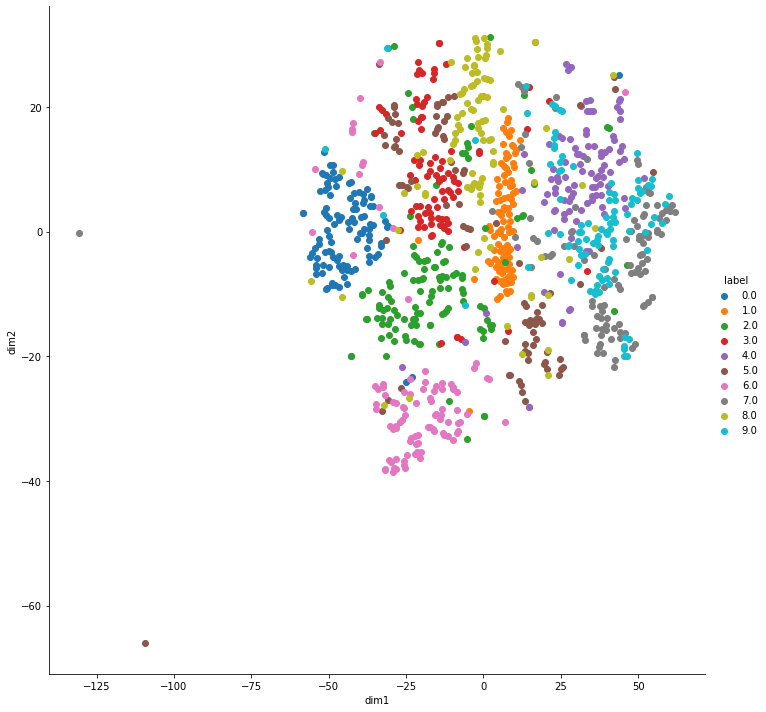

In [28]:
sn.FacetGrid(tsne_df,hue='label',size=10).map(plt.scatter,'dim1','dim2').add_legend()